<a href="https://colab.research.google.com/github/DawoodBhai420/Small-Image-Classification-Using-CNN/blob/main/cifar_10_image_classification_with_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [4]:
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=.2,
                                   height_shift_range=.2,
                                   shear_range=.2,
                                   zoom_range=.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_generator = train_datagen.flow(X_train, y_train)
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow(X_test, y_test)

In [6]:
from tensorflow.keras.applications.mobilenet import MobileNet
pretrained_model = MobileNet(input_shape=(32,32,3), include_top=False, weights='imagenet')

17235968/17225924 [==============================] - 0s 0us/step


In [8]:
for layer in pretrained_model.layers:
  layer.trainable = False

In [9]:
last_layer = pretrained_model.get_layer('conv_pw_13_relu')

In [10]:
last_layer_op = last_layer.output

In [11]:
last_layer_op

<KerasTensor: shape=(None, 1, 1, 1024) dtype=float32 (created by layer 'conv_pw_13_relu')>

In [12]:
x = keras.layers.Flatten()(last_layer.output)
x = keras.layers.Dense(1024, activation='relu')(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(10, activation='softmax')(x)
model = keras.Model(pretrained_model.input, x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 16, 16, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 16, 16, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 16, 16, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 16, 16, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 16, 16, 32)       128       
 ation)                                                      

In [13]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
his = model.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test), verbose=1)

Epoch 1/10
1563/1563 [==============================] - 30s 13ms/step - loss: 2.1748 - accuracy: 0.1913 - val_loss: 2.1656 - val_accuracy: 0.1891
Epoch 2/10
1563/1563 [==============================] - 19s 12ms/step - loss: 2.1542 - accuracy: 0.2017 - val_loss: 2.1520 - val_accuracy: 0.1995
Epoch 3/10
1563/1563 [==============================] - 19s 12ms/step - loss: 2.1498 - accuracy: 0.2043 - val_loss: 2.1431 - val_accuracy: 0.2058
Epoch 4/10
1563/1563 [==============================] - 19s 12ms/step - loss: 2.1470 - accuracy: 0.2071 - val_loss: 2.1462 - val_accuracy: 0.2021
Epoch 5/10
1563/1563 [==============================] - 19s 12ms/step - loss: 2.1457 - accuracy: 0.2089 - val_loss: 2.1452 - val_accuracy: 0.2030
Epoch 6/10
1563/1563 [==============================] - 19s 12ms/step - loss: 2.1465 - accuracy: 0.2089 - val_loss: 2.1511 - val_accuracy: 0.2027
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - loss: 2.1453 - accuracy: 0.2087 - val_loss: 2.1477 -

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def test(X,y,index):
  plt.imshow(X[index])
  print(classes[y[index]])
  X[index] = X[index]/255
  pred = model.predict(X[index])
  print(classes[pred])

airplane


ValueError: ignored

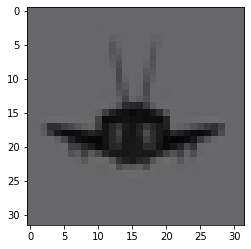

In [ ]:
test(X_test, y_test, 5437)